## Instalar paquetes necesarios
- Pandas (Para cargar CSV)
- NumPy
- Matplotlib (Para visualizar datos)
- SKLearn
- Seaborn

In [2]:
# Instalar paquetes necesarios
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargar dataset
Cargar y visualizar dataset of laptops

In [2]:
dataframe = pd.read_csv(r"laptops.csv")
dataframe["Combine"] = dataframe["CPU.Speed"] * dataframe["RAM.Size"] + dataframe["GPU.Speed"]
dataframe.head()

,Manufacturer,Model.Name,Category,Screen,CPU,Storage,GPU,Operating.System,Weight,Price,CPU.Speed,Storage.Type,GPU.Rank,Storage.Size,RAM.Size,Screen.Size,Category.Type,GPU.Speed,Combine
0,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,2.5,1,885,256,8,39.624,1,1752,1772.0
1,Acer,Aspire 3,Notebook,1366x768,AMD A9-Series 9420 3GHz,500GB HDD,AMD Radeon R5,Windows,2.10,400.0,3.0,0,832,500,4,39.624,1,1805,1817.0
2,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,512GB SSD,Nvidia GeForce MX150,Windows,1.30,1495.0,1.8,1,469,512,16,35.560,2,2168,2196.8
3,Acer,Swift 3,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows,1.60,770.0,1.6,1,809,256,8,35.560,2,1828,1840.8
4,HP,250 G6,Notebook,1366x768,Intel Core i5 7200U 2.5GHz,500GB HDD,Intel HD Graphics 620,No OS,1.86,393.9,2.5,0,885,500,4,39.624,1,1752,1762.0


In [78]:
dataframe.describe()

,Weight,Price,CPU.Speed,Storage.Type,GPU.Rank,Storage.Size,RAM.Size,Screen.Size,Category.Type,GPU.Speed,Combine
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,2.037229,1123.686992,2.298388,0.704528,808.433615,583.012279,8.382195,38.143665,2.269378,1828.566385,1848.780507
std,0.663249,699.009043,0.506992,0.456430,369.751230,427.449649,5.084665,3.622812,1.837159,369.751230,379.182954
min,0.690000,174.000000,0.900000,0.000000,50.000000,1.000000,2.000000,25.654000,1.000000,1.000000,9.000000
25%,1.500000,599.000000,2.000000,0.000000,659.000000,256.000000,4.000000,35.560000,1.000000,1716.000000,1725.200000
50%,2.040000,977.000000,2.500000,1.000000,885.000000,500.000000,8.000000,39.624000,1.000000,1752.000000,1773.600000
75%,2.300000,1487.880000,2.700000,1.000000,921.000000,1024.000000,8.000000,39.624000,3.000000,1978.000000,1996.800000
max,4.700000,6099.000000,3.600000,1.000000,2636.000000,2048.000000,64.000000,46.736000,6.000000,2587.000000,2704.800000


## Graficar las entradas
Basado en sus diferentes propiedades, se muestra como se distribuyen los equipos

array([[<AxesSubplot:title={'center':'Combine'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'CPU.Speed'}>,
        <AxesSubplot:title={'center':'GPU.Speed'}>,
        <AxesSubplot:title={'center':'Storage.Size'}>],
       [<AxesSubplot:title={'center':'RAM.Size'}>,
        <AxesSubplot:title={'center':'Screen.Size'}>,
        <AxesSubplot:title={'center':'Category.Type'}>],
       [<AxesSubplot:title={'center':'Storage.Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

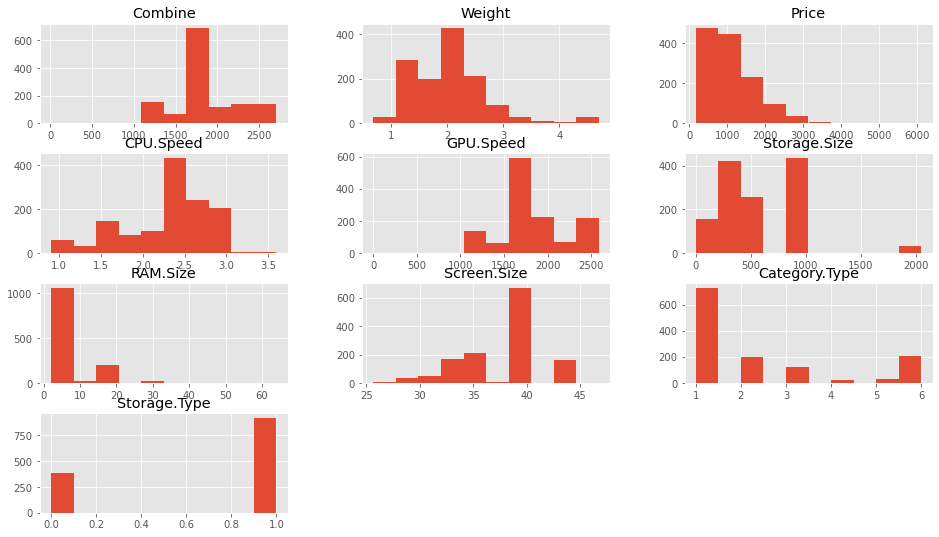

In [79]:
dataframe.hist(["Combine", "Weight", "Price", "CPU.Speed", "GPU.Speed", "Storage.Size", "RAM.Size", "Screen.Size", "Category.Type", "Storage.Type"])

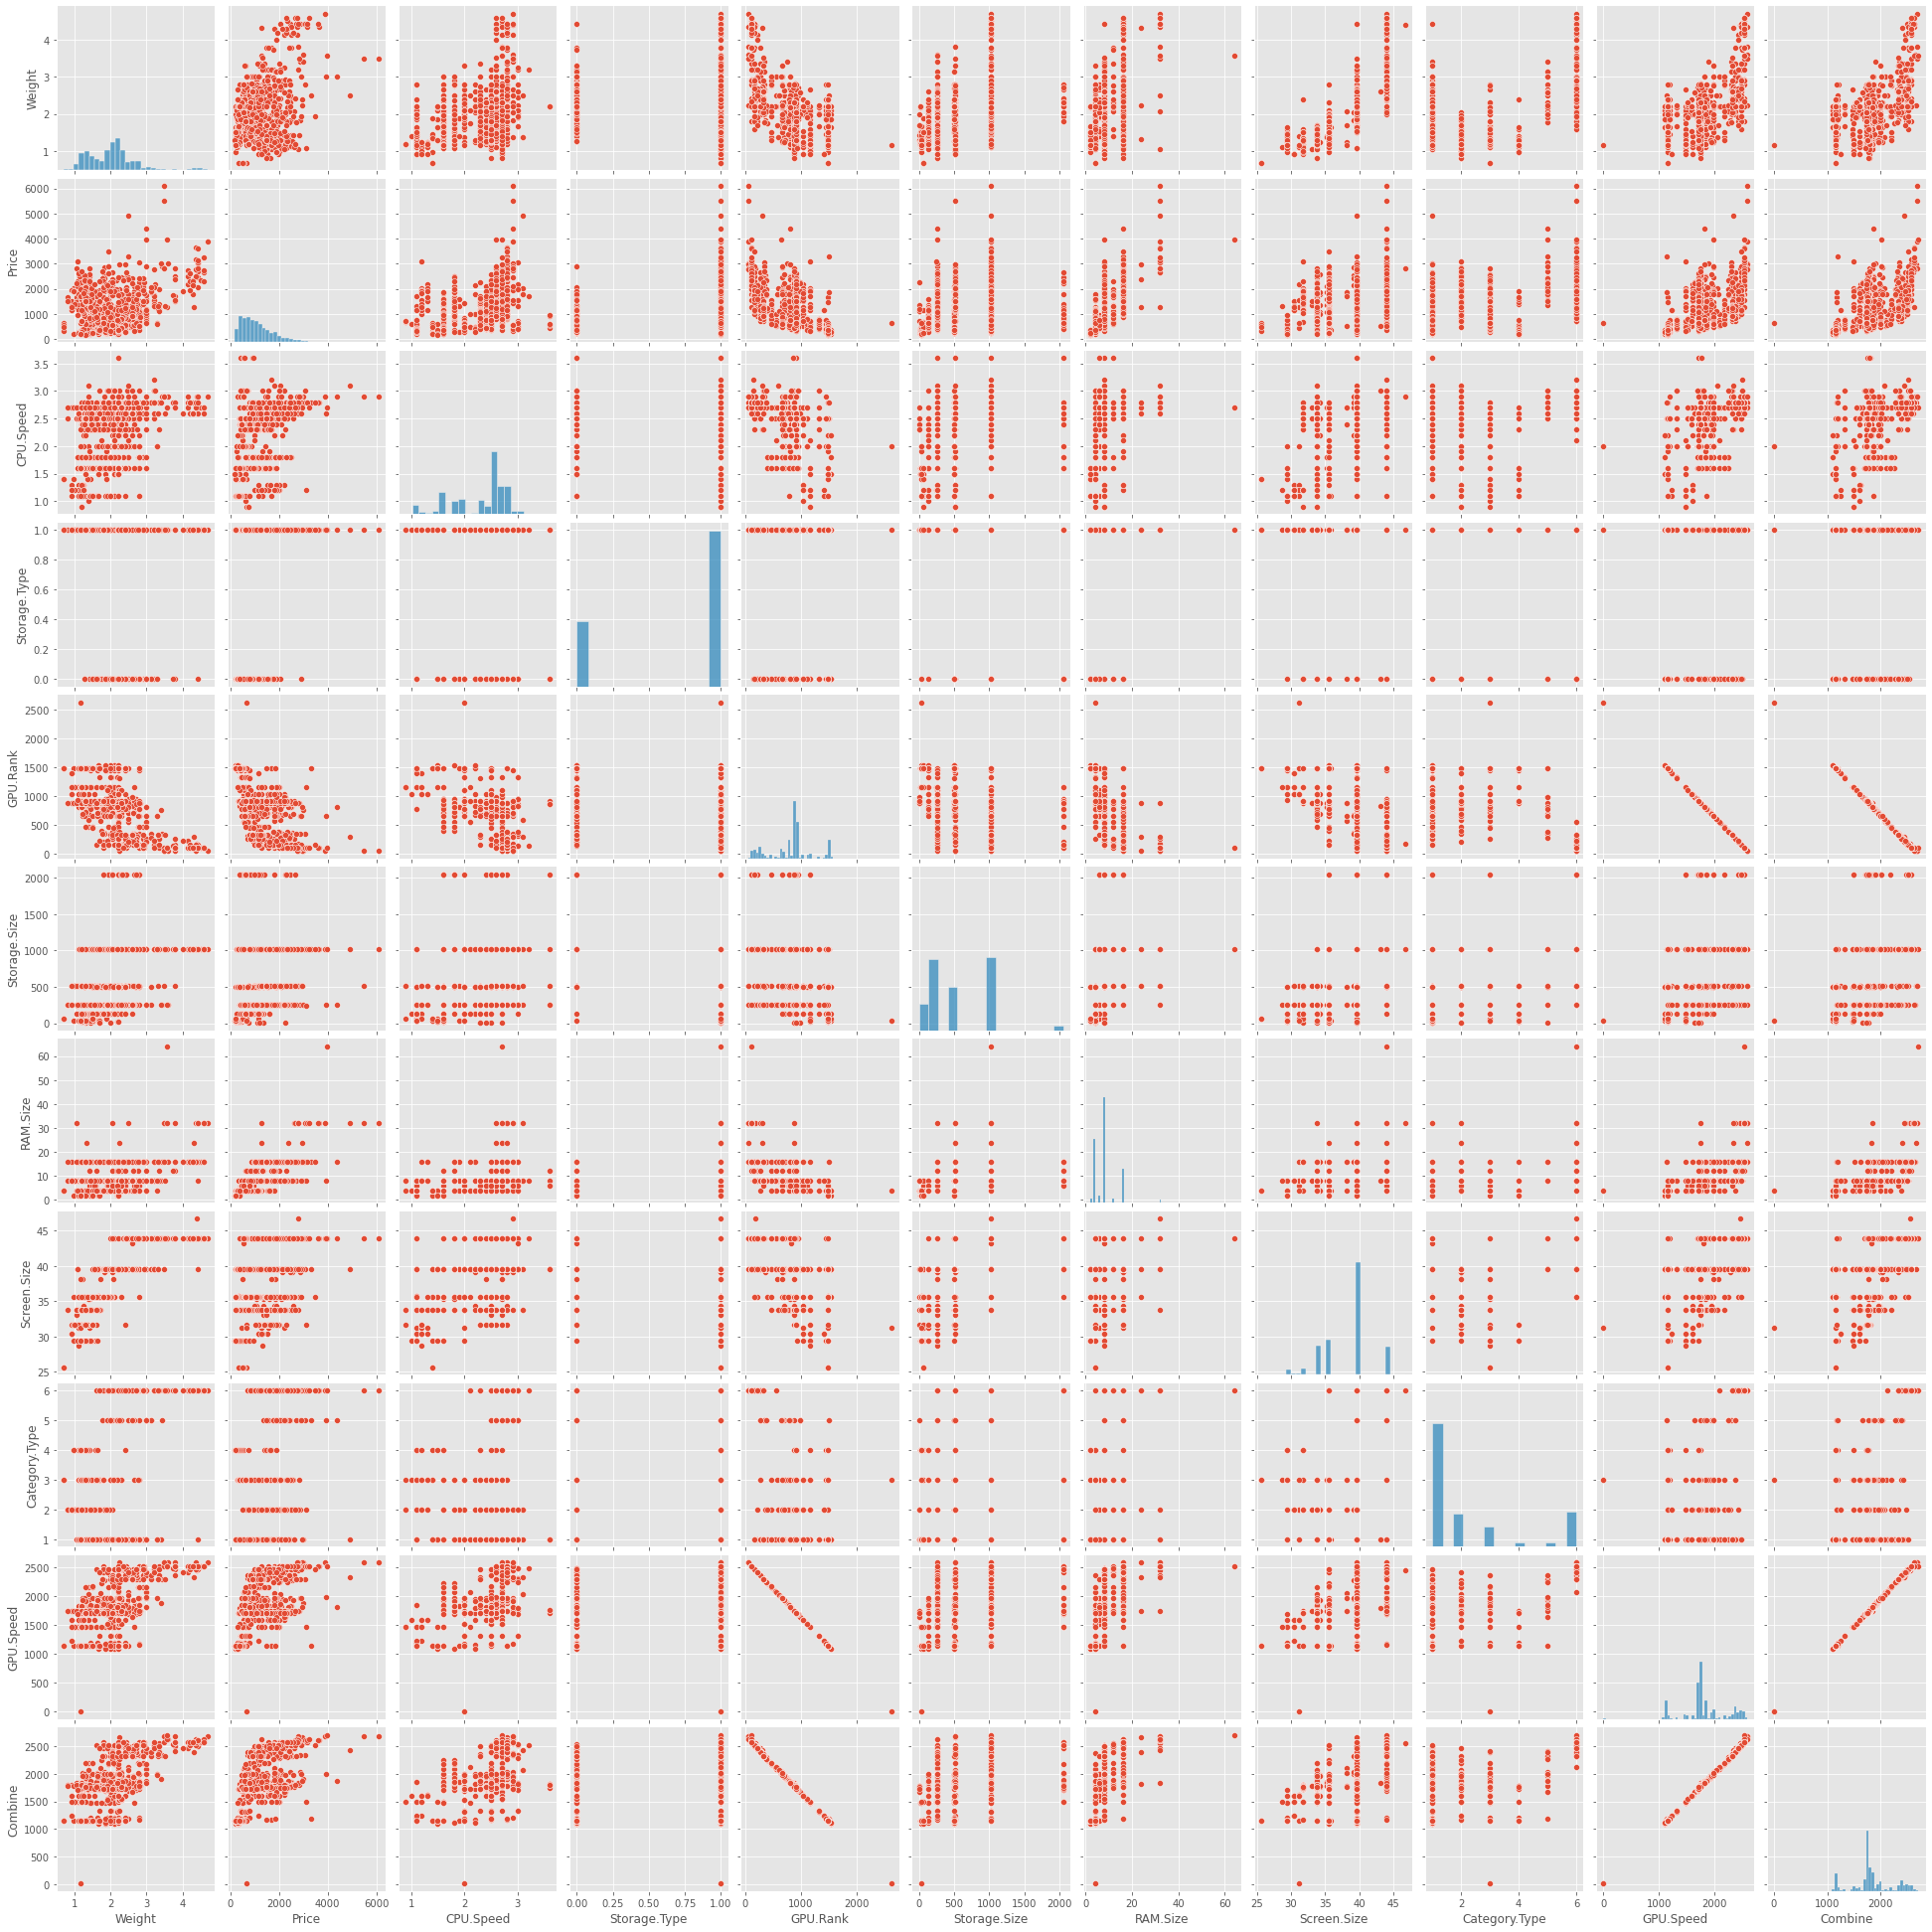

In [82]:
sb.pairplot(dataframe)

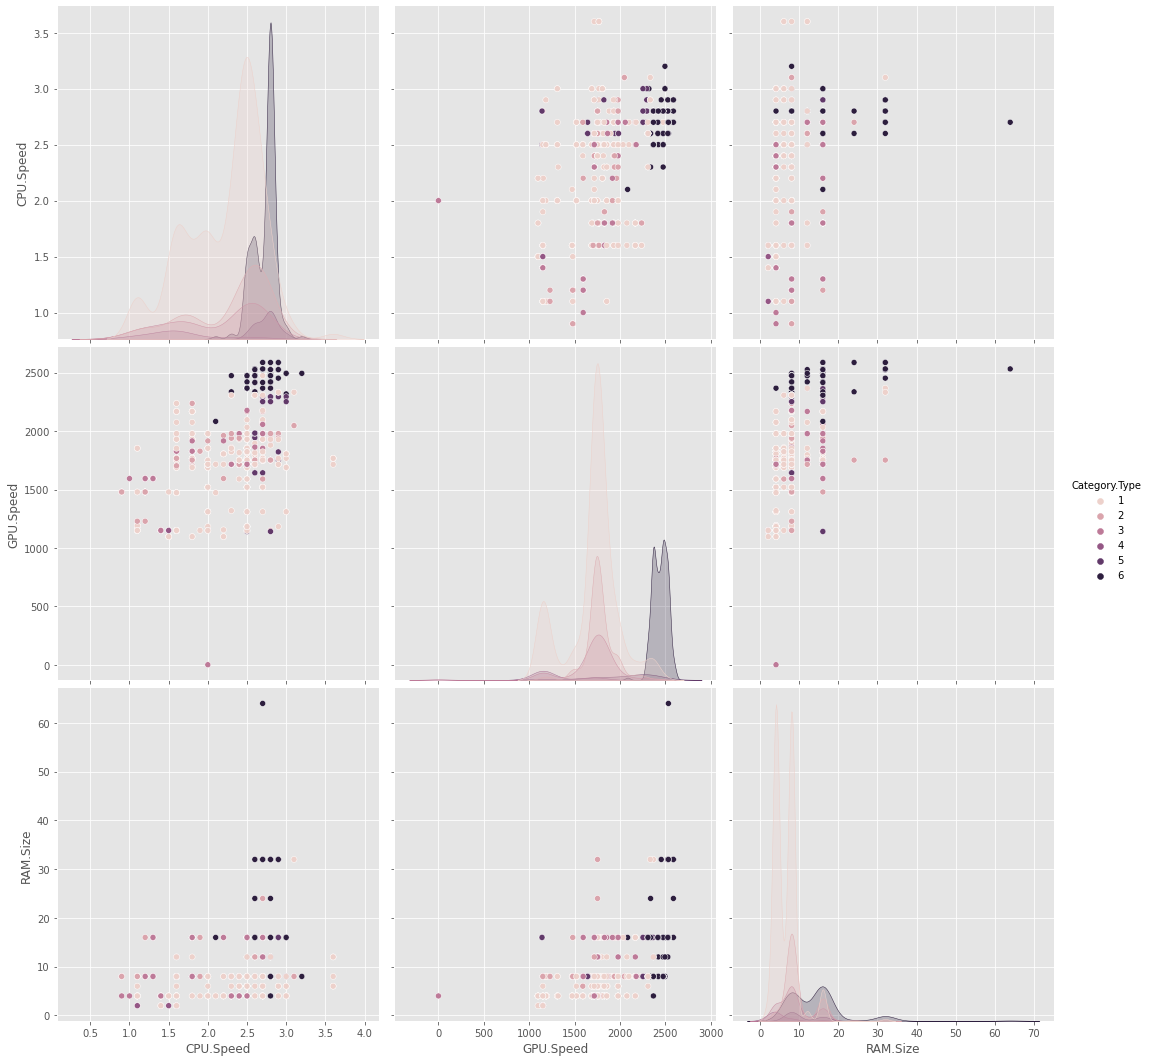

In [80]:
sb.pairplot(dataframe, hue="Category.Type", height=5, vars=["CPU.Speed", "GPU.Speed", "RAM.Size"], kind="scatter")

In [126]:
#X = np.array(dataframe[["CPU.Speed", "GPU.Speed", "RAM.Size", "Price"]])
X = np.array(dataframe[["Combine", "Price"]])
#Y = np.array(dataframe["Category.Type"])
Y = np.array(dataframe["Price"])
X.shape

(1303, 2)

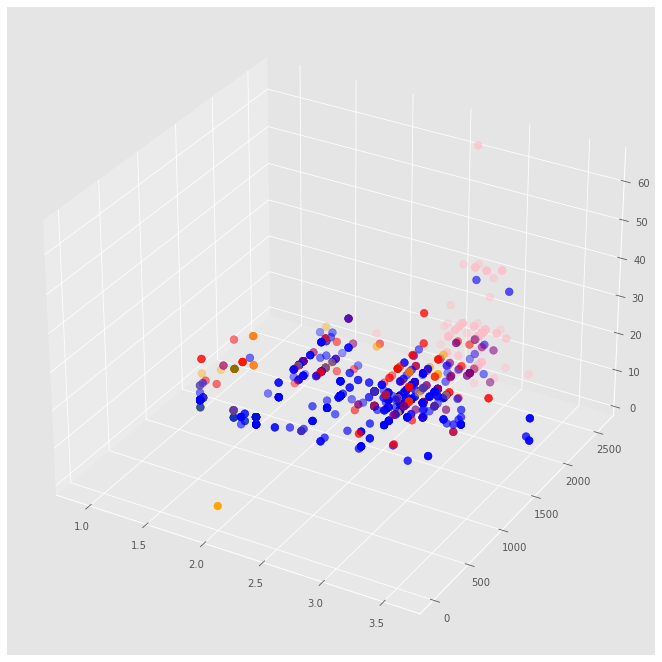

In [40]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
colors = ["blue", "red", "orange", "green", "purple", "pink"]
assign = []
for row in Y:
    assign.append(colors[row - 1])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign, s=60)

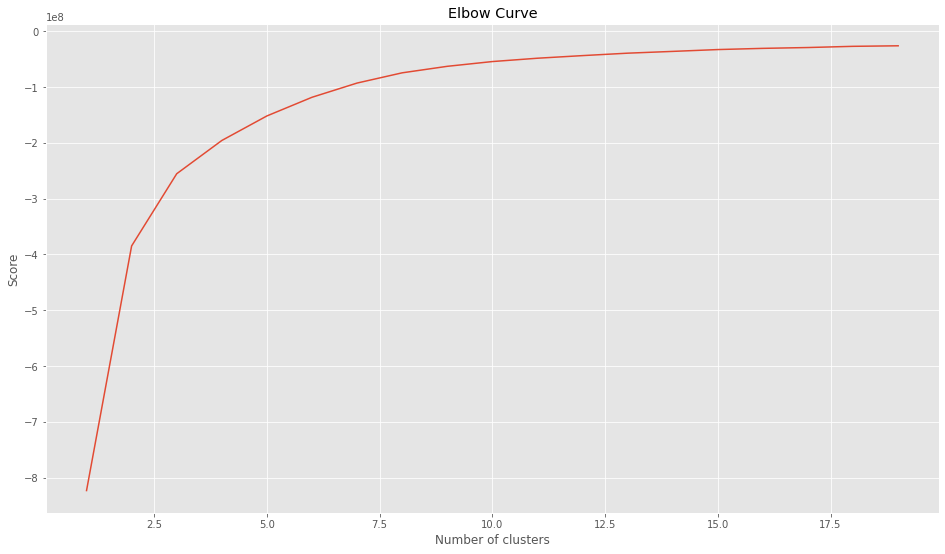

In [90]:
nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(nc, score)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [127]:
kmeans = KMeans(n_clusters=5).fit(X)
print(kmeans)
centerIds = kmeans.cluster_centers_
print(centerIds)

KMeans(n_clusters=5)
[[1795.35992844  744.64423971]
 [1775.95940959 1573.63228782]
 [2302.6637931  2677.62568966]
 [2399.83052632 1312.31584211]
 [1203.5508982   368.31784431]]


In [118]:
predictions = kmeans.predict(X)
dataframe["Cluster"] = predictions

print(dataframe.groupby("Cluster").size())
dataframe.head()

Cluster
0    560
1    273
2    116
3    167
4    187
dtype: int64


,Manufacturer,Model.Name,Category,Screen,CPU,Storage,GPU,Operating.System,Weight,Price,CPU.Speed,Storage.Type,GPU.Rank,Storage.Size,RAM.Size,Screen.Size,Category.Type,GPU.Speed,Combine,Cluster
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,1,698,128,8,33.782,2,1939,1957.4,1
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,1,934,128,8,33.782,2,1703,1717.4,0
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,1,885,256,8,39.624,1,1752,1772.0,0
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,359,512,16,39.116,2,2278,2321.2,2
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,1,590,256,8,33.782,2,2047,2071.8,1


In [98]:
labels = kmeans.predict(X)
C = centerIds

cCpuSpeed = C[:, 0]
cGpuSpeed = C[:, 1]
cRamSize = C[:, 2]
cPrice = C[:, 3]

colors = ["blue", "red", "purple", "green", "orange"]

assign = []
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker="x", c=colors, s=1000)



IndexError: index 2 is out of bounds for axis 1 with size 2

## Relación CPU <> Price


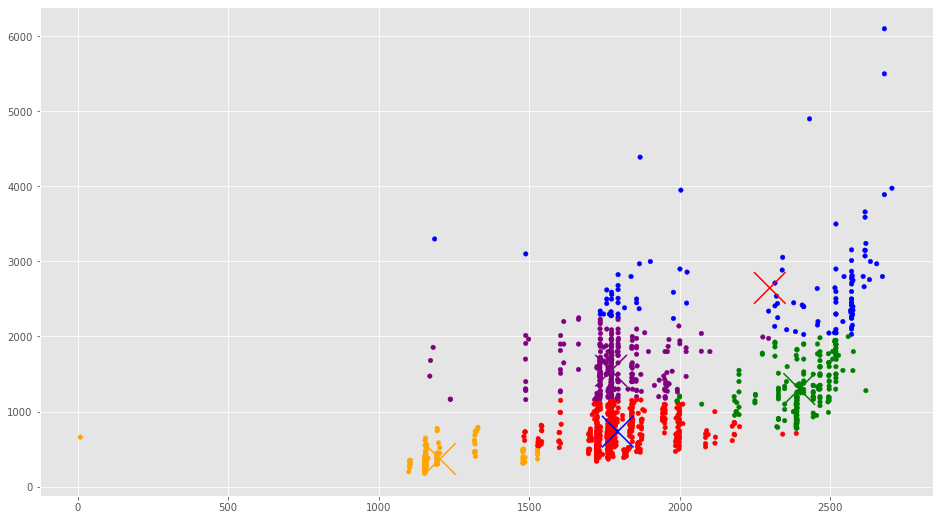

In [97]:
C = centerIds

f1 = dataframe["Combine"].values
f2 = dataframe["Price"].values
c1 = cCpuSpeed
c2 = cPrice

c1 = C[:, 0]
c2 = C[:, 1]

plt.scatter(f1, f2, c=assign, s=20)
plt.scatter(c1, c2, marker="x", c=colors, s=1000)

## Relación GPU <> Price

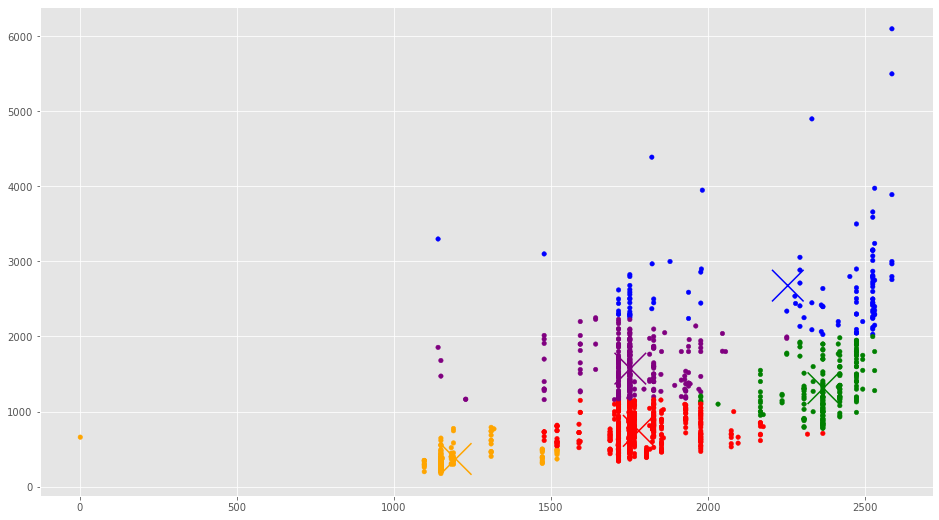

In [61]:
f1 = dataframe["GPU.Speed"].values
f2 = dataframe["Price"].values
c1 = cGpuSpeed
c2 = cPrice
plt.scatter(f1, f2, c=assign, s=20)
plt.scatter(c1, c2, marker="x", c=colors, s=1000)

## Relación RAM <> Price

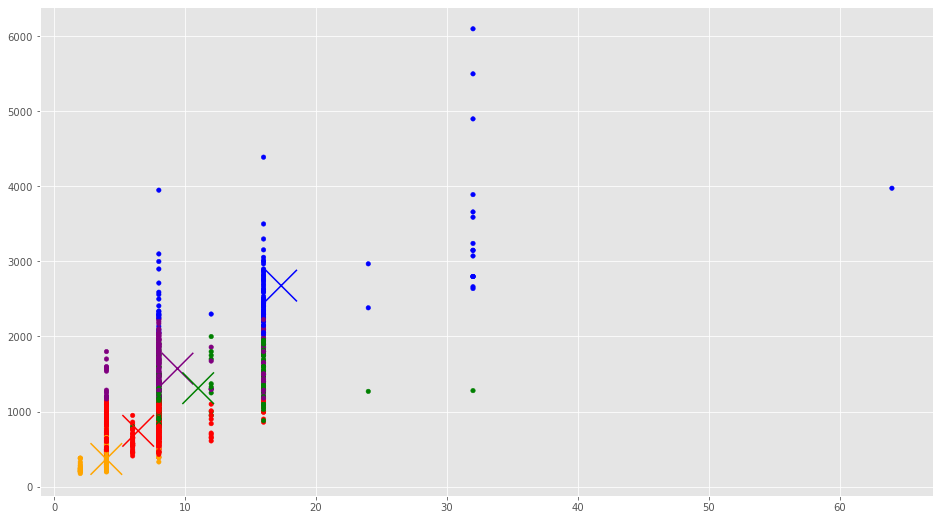

In [64]:
f1 = dataframe["RAM.Size"].values
f2 = dataframe["Price"].values
c1 = cRamSize
c2 = cPrice

plt.scatter(f1, f2, c=assign, s=20)
plt.scatter(c1, c2, marker="x", c=colors, s=1000)

In [75]:
summary = pd.DataFrame()
summary["Category.Type"] = dataframe["Category.Type"].values
summary["Label"] = labels

groups = pd.DataFrame()
groups["Color"] = colors
groups["Quantity"] = summary.groupby("Label").size()
groups

,Color,Quantity
0,blue,116
1,red,557
2,purple,272
3,green,191
4,orange,167
